# Feb 16 Recitation

### A short summary

The `python` programming part of today's recitation will be brief - we'll mostly concentrate on homework and quiz problems. 

Plan for this recitation:

* To see see how to compute the binomial coefficients (combinations $n$ choose $k$) in python.
* To do problems 5 and 6 from today's homework.

To begin, import these libraries:

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

## Combinations  $\binom{n}{k}$ 

In [2]:
from scipy.special import comb
k = 3
#k = np.array([1, 5])
n = 5
#n = np.array([6, 6])
print(comb(n, k))

10.0


### Question 6 from homework
Recall that in question 6 you were given:
* 10 question mulitple choice exam. 
* Chances of answering a question correctly, independently of other questions: 1/4


And we wanted to compute the probability of answering 6 or more questions correctly.

Now, if you were interested in the following exact probabilities,
$$ P(\text{answer exactly 6 corectly} ) = \binom{10}{6} (1/4)^6 (3/4)^4 $$
$$ P(\text{answer exactly 6 corectly} ) = \binom{10}{7} (1/4)^7 (3/4)^3 $$
$$ \ldots $$
$$ P(\text{answer exactly 10 corectly} ) = \binom{10}{10} (1/4)^{10} = (1/4)^{10} $$

you might want to try the following approch (to be improved in a minute):

In [3]:
n = 10
k = 6 
p = 1/4
#n, k, p = 10, 6, 1/4

six_correct = comb(n, k) * (p)**k * (1 - p)**(n - k)
#six_correct
k = 7
seven_correct = comb(n, k) * (p)**k * (1 - p)**(n - k)
k = 8
eight_correct = comb(n, k) * (p)**k * (1 - p)**(n - k)
k = 9
nine_correct = comb(n, k) * (p)**k * (1 - p)**(n - k)
k = 10
ten_correct = comb(n, k) * (p)**k * (1 - p)**(n - k)
#ten_correct

In [4]:
six_or_more_correct = six_correct + seven_correct + eight_correct + nine_correct + ten_correct
six_or_more_correct

0.019727706909179688

#### Now, with `numpy` you can do this much quicker:

In [5]:
n = 10
ks = np.arange(6, 11)

sum = 0
for k in ks:
    sum = sum + comb(n, k) * (p)**k * (1 - p)**(n - k)
print(sum)

0.0197277069092


#### Or, to be pythonic about the whole thing:

In [6]:
probs = [comb(n, k) * (p)**k * (1 - p)**(n - k) for k in ks]
np.sum(probs)

0.019727706909179688

## Problem 5 from homework

Recall that in question 5 you were given:
* 10 screws in a package.
* Chances of a screw being defective: 0.01 

You needed to compute the probability that 2 or more screws were defective.

Well, it's easier to compute the probability that either no screws are defective or that exactly one screw is defective. We then subtract this probability from 1 to obtain the desired probability.



In [7]:
n, p = 10, 0.01
ks = np.arange(2)
sum = 0
for k in ks:
    sum = sum + comb(n, k) * (p)**k * (1 - p)**(n - k)
print(sum)
print(1-sum)

0.995733799757
0.00426620024283


Or, to be pythonic about this

In [8]:
probs = [comb(n, k) * (p)**k * (1 - p)**(n - k) for k in ks]
print(1 - np.sum(probs))

# Which shoud be the same as:
ks = np.arange(2, 11)
probs = [comb(n, k) * (p)**k * (1 - p)**(n - k) for k in ks]
print(np.sum(probs))

0.00426620024283
0.00426620024283


### Binomial Probabilities
We'll get to this next week, but there is an even better way to compute the above probabilites. 

In [9]:
#for question 6
n, p = 10, 0.25
x = np.arange(0, 11)
rv = binom(n, p)
np.sum(rv.pmf(x)[6:])

0.019727706909179722

In [10]:
#for question 5
n, p = 10, 0.01
x = np.arange(0, 11)
rv = binom(n, p)
np.sum(rv.pmf(x)[2:])

0.0042662002428314229

[  9.04382075e-01   9.13517247e-02   4.15235112e-03   1.11847842e-04
   1.97710831e-06   2.39649493e-08   2.01725162e-10   1.16435880e-12
   4.41045000e-15   9.90000000e-18   1.00000000e-20]


<Container object of 11 artists>

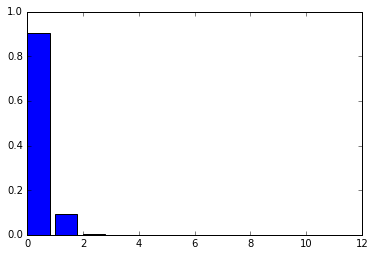

In [16]:
print(rv.pmf(x))
#len(rv.pmf(x))
plt.bar(x, rv.pmf(x))